# Twitter Analysis: Toronto Tweets
By: Jennifer Johnson

Exploratory Data Analysis on Twitter data filtered for Toronto Only

In [1]:
import pandas as pd
import re
import spacy
import nltk
import string
import ast
import numpy as np
import seaborn as sns

import missingno as msno

from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid") 

In [2]:
spacy.load('en')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from spacy.lang.en import English
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from translate import Translator

parser = English()
translator = Translator(to_lang="English")

In [4]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [5]:
# Filter out stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))

In [6]:
def processTweet(tweet):
    # process the tweets
    translator = str.maketrans('', '', string.punctuation)

    #Convert to lower case
    tweet = tweet.lower()
    
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #trim
    tweet = tweet.strip('\'"')
    
    #remove punctuation from text
    tweet = tweet.translate(translator)
    
    tweet = tweet.split()
    tweet = [get_lemma(token) for token in tweet]
    tweet = [token for token in tweet if token not in en_stop]
    tweet = ' '.join(tweet)
    return tweet

In [9]:
# Load dataframe
tweets_df = pd.read_csv('D:/development/CSDA1050/playground/twitter_jj/twitter_tweets_new.csv')
tweets_df = tweets_df[tweets_df['place_country']=='Canada']
tweets_df.shape

(299111, 24)

In [12]:
# changing tweet_text to String column (returned error about 'float')
# when full dataset was used
tweets_df['tweet_text'] = tweets_df['tweet_text'].astype(str)
tweets_df['tweet_clean'] = tweets_df['tweet_text'].apply(processTweet)

In [13]:
import pytz

In [14]:
def getTZ(tweet_date):
    est = pytz.timezone('US/Eastern')
    
    tweet_date = pd.Timestamp(tweet_date).tz_localize('UTC')
    tweet_date = tweet_date.astimezone(est)
    
    return tweet_date

In [15]:
# changing tweet_date to DateTime column
tweets_df.tweet_date = pd.to_datetime(tweets_df['tweet_date'])
tweets_df['tweet_date'] = tweets_df['tweet_date'].apply(getTZ)

In [16]:
tweets_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,reply_to_status,reply_to_user,sensitive,sentiment,source,tweet_date,tweet_text,user_id,user_name,tweet_clean
0,[':red_heart:'],NaN,1107369998148788224,en,NaN,NaN,NaN,"[[[-79.583667, 43.550871], [-79.583667, 43.550...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",Twitter for iPhone,2019-03-17 15:55:56.155000-04:00,Loving the vibes :red_heart:️ https://t.co/X8v...,908049944040361984,wikki_87,love vibes redheart️
1,[],NaN,1107370010182324229,und,NaN,NaN,"['Rosalestri', 'Cnyari']","[[[-80.248423, 43.050553], [-80.248423, 43.470...",Polygon,Canada,...,1.107354e+18,Rosalestri,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Twitter for Android,2019-03-17 15:55:59.024000-04:00,@Rosalestri @Cnyari Olé,16801721,njsh2008,olé
4,"[':fearful_face:', ':fearful_face:', ':flushed...",NaN,1107370005883023360,ko,NaN,NaN,['BTS_twt'],"[[[-95.155898, 41.676329], [-95.155898, 56.852...",Polygon,Canada,...,NaN,BTS_twt,False,"{'neg': 0.187, 'neu': 0.51, 'pos': 0.304, 'com...",Twitter for iPhone,2019-03-17 15:55:57.999000-04:00,"@BTS_twt 김태형, 밴드에이드? :fearful_face::fearful_fa...",828139192035196928,BangtanBabeXO,김태형 밴드에이드 fearfulfacefearfulface wa cut hope d...
5,[],NaN,1107370047134224384,en,NaN,NaN,['MazharAbbasGEO'],"[[[-79.810142, 43.373074], [-79.810142, 43.737...",Polygon,Canada,...,1.107348e+18,MazharAbbasGEO,False,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",Twitter for Android,2019-03-17 15:56:07.834000-04:00,@MazharAbbasGEO WHAT ABOUT THIS SHAMELESS http...,127687121,ZA_chaudhry,shameless
6,[],"['torontocontractors', 'renovation', 'interior...",1107370085608538113,en,43.7166,-79.3407,NaN,"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Instagram,2019-03-17 15:56:17.007000-04:00,"Before and after, big different....\n.\n.\n.\n...",349291874,905RENO,big different torontocontractors renovation in...


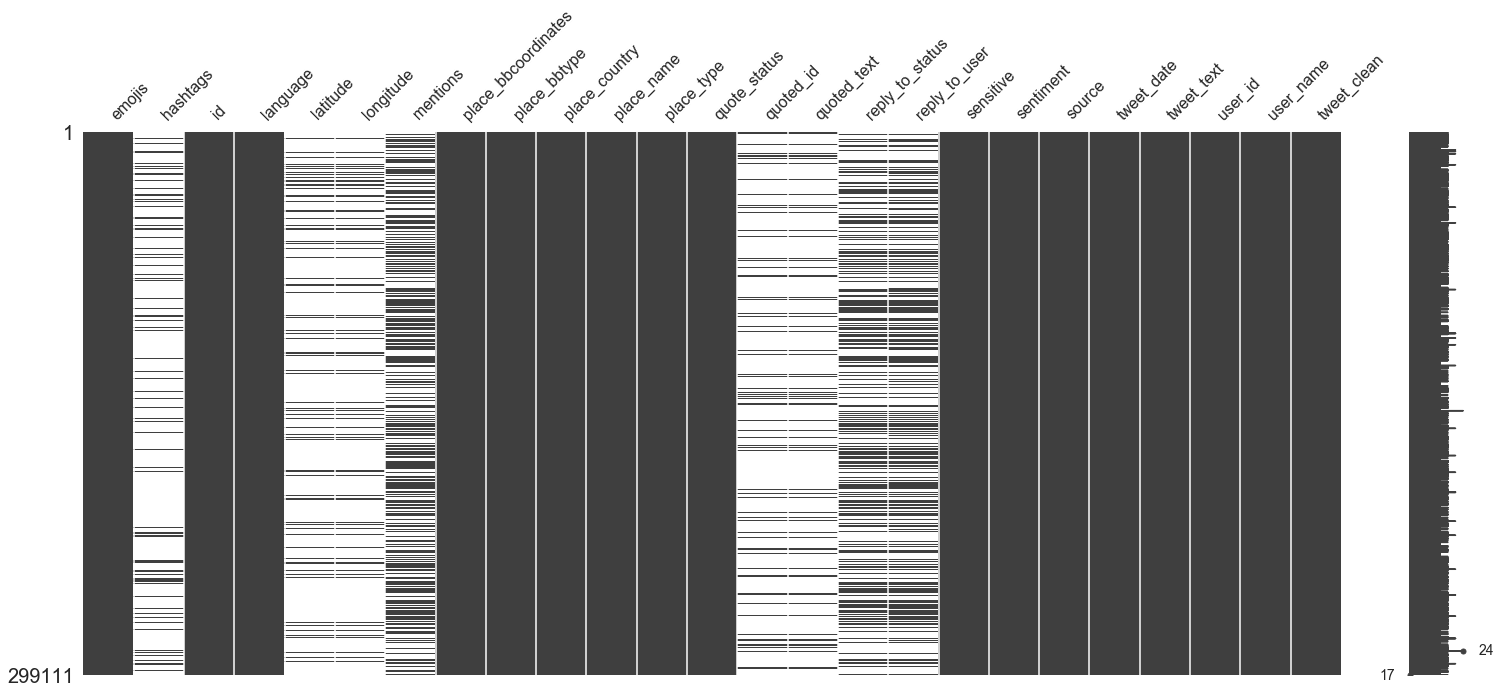

In [17]:
# check for missing data
msno.matrix(tweets_df)

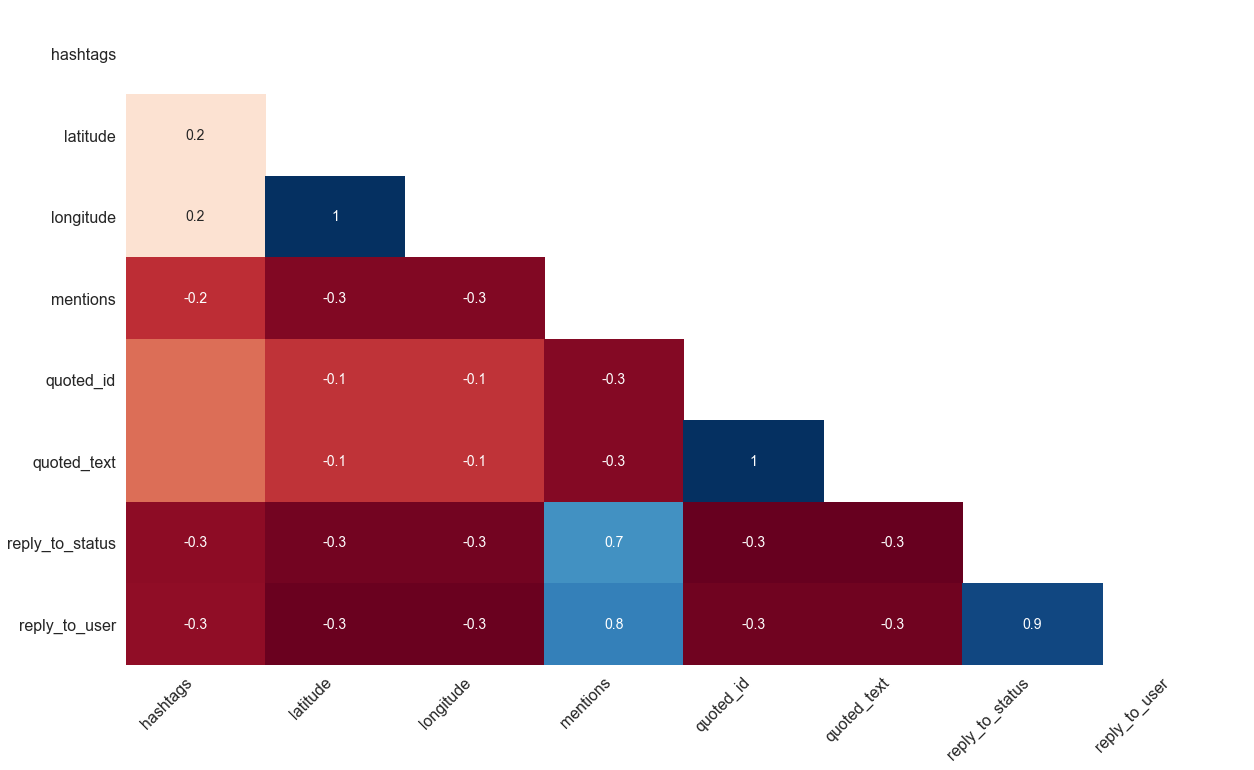

In [18]:
# missing correlation matrix
msno.heatmap(tweets_df)

In [19]:
tweets_df.dtypes

emojis                                     object
hashtags                                   object
id                                          int64
language                                   object
latitude                                  float64
longitude                                 float64
mentions                                   object
place_bbcoordinates                        object
place_bbtype                               object
place_country                              object
place_name                                 object
place_type                                 object
quote_status                                 bool
quoted_id                                 float64
quoted_text                                object
reply_to_status                           float64
reply_to_user                              object
sensitive                                    bool
sentiment                                  object
source                                     object


In [20]:
# Tweets by Date
# See how many tweets come in at a time from streaming
tweets_df['tweet_time'] = tweets_df['tweet_date'].values.astype('datetime64[m]')
tweets_date = tweets_df.groupby('tweet_time').id.agg('count').reset_index(name='count')
tweets_date.head()

,tweet_time,count
0,2019-03-17 19:55:00,3
1,2019-03-17 19:56:00,9
2,2019-03-17 19:57:00,11
3,2019-03-17 19:58:00,12
4,2019-03-17 19:59:00,13


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


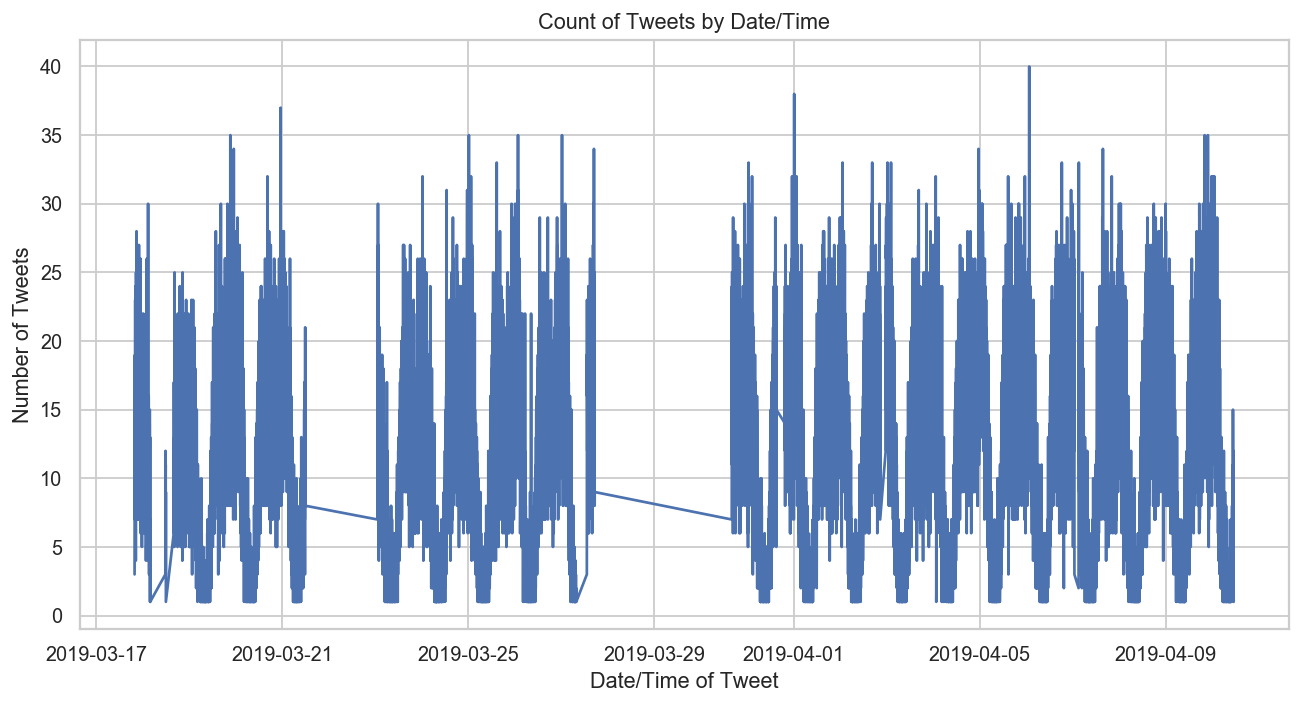

In [21]:
x = tweets_date['tweet_time']; y = tweets_date['count']

plt.figure(figsize=(12,6), dpi=130)
plt.xlabel('Date/Time of Tweet', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.title('Count of Tweets by Date/Time')
plt.plot(x, y)
plt.show()

In [22]:
tweets_df['tweet_dt']= tweets_df['tweet_date'].dt.normalize()
# Number of Tweets by Day
tweets_day = tweets_df.groupby('tweet_dt')['id'].count()
tweets_day.head()

tweet_dt
2019-03-17 00:00:00-04:00     6691
2019-03-18 00:00:00-04:00     9129
2019-03-19 00:00:00-04:00    15931
2019-03-20 00:00:00-04:00    16692
2019-03-21 00:00:00-04:00     2610
Name: id, dtype: int64

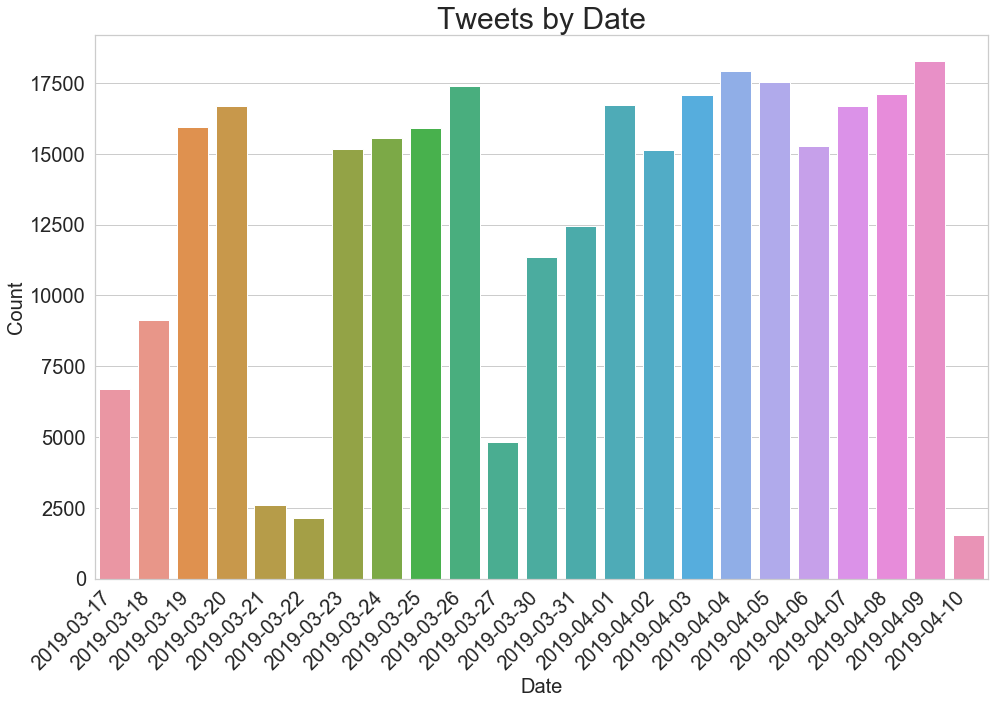

In [25]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_dt', data=tweets_df)
x_dates = tweets_df['tweet_dt'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.axes.set_title("Tweets by Date",fontsize=30)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [27]:
tweets_df['tweet_hour'] = tweets_df.tweet_date.dt.hour
# Number of Tweets by Time of Day
tweets_tod = tweets_df.groupby('tweet_hour')['id'].count().reset_index(name='count')
tweets_tod.head()

,tweet_hour,count
0,0,9549
1,1,5966
2,2,3924
3,3,2489
4,4,1991


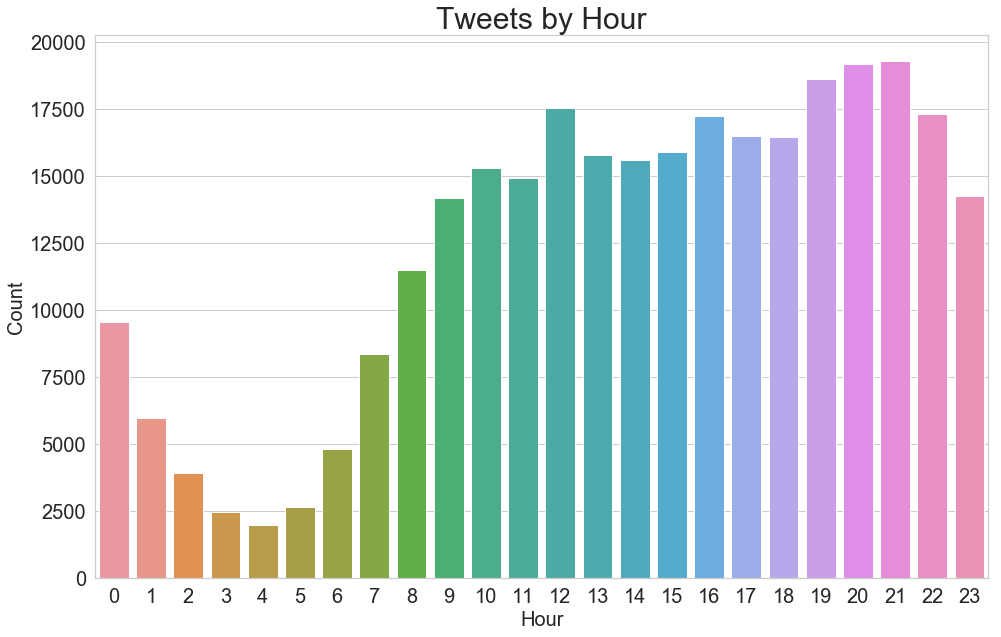

In [28]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_hour', data=tweets_df)
ax.axes.set_title("Tweets by Hour",fontsize=30)
ax.set_xlabel("Hour",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [29]:
tweets_df['tweet_dow'] = pd.to_datetime(tweets_df['tweet_date']).dt.dayofweek
# Number of Tweets by Day of Week
tweets_dow = tweets_df.groupby('tweet_dow')['id'].count().reset_index(name='count')
tweets_dow.head()

,tweet_dow,count
0,0,58852
1,1,66747
2,2,40142
3,3,20531
4,4,19668


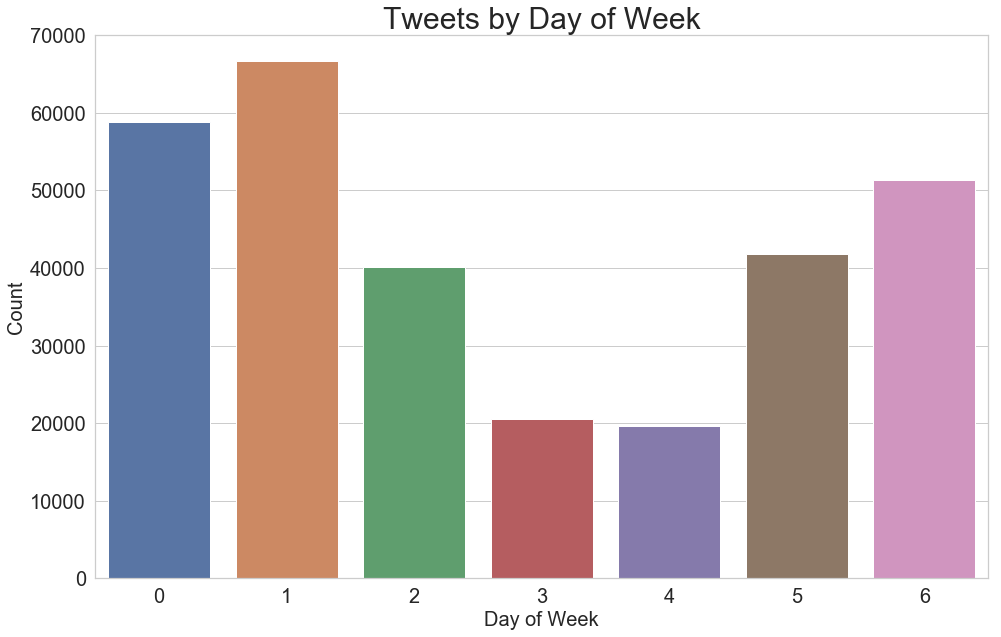

In [30]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_dow', data=tweets_df)
ax.axes.set_title("Tweets by Day of Week",fontsize=30)
ax.set_xlabel("Day of Week",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [31]:
tweets_dh = tweets_df.groupby(['tweet_dt', 'tweet_hour'])['id'].count() \
.reset_index(name='count')
tweets_dh.head()

,tweet_dt,tweet_hour,count
0,2019-03-17 00:00:00-04:00,15,48
1,2019-03-17 00:00:00-04:00,16,1028
2,2019-03-17 00:00:00-04:00,17,822
3,2019-03-17 00:00:00-04:00,18,963
4,2019-03-17 00:00:00-04:00,19,848


In [32]:
tweets_dh['tweet_dt'] = tweets_dh['tweet_dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

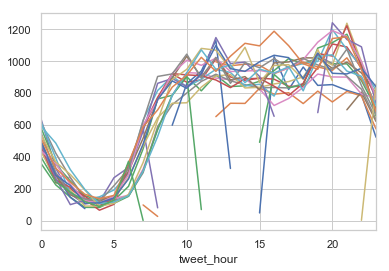

In [33]:
tweets_dh \
    .groupby([tweets_dh.tweet_hour.name, tweets_dh.tweet_dt.name])\
    .sum() \
    .unstack() \
    .plot(legend=False)

#### Tweets by Hour of Day (Broken out by Day)
To show gaps in the data load


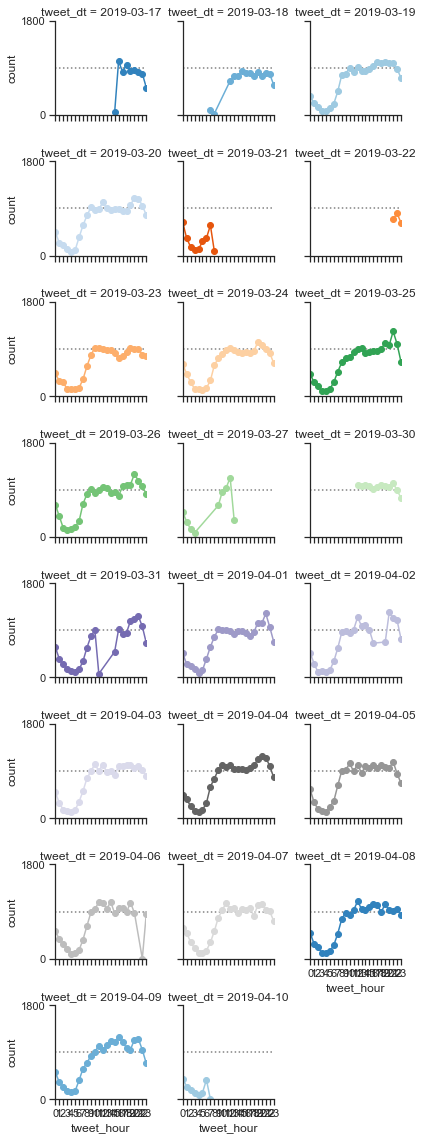

In [34]:
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(tweets_dh, col="tweet_dt", hue="tweet_dt", palette="tab20c",
                     col_wrap=3, height=2)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=900, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "tweet_hour", "count", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(24), yticks=[0, 1800],
         xlim=(0, 23), ylim=(0, 1800))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#### Tweets by User
Difference in Top 5 list, "511NY", "BrendaLeeNY", and "gleexhy" are replaced with "biggles14", "alyaly89770924", and "Aliya313" with the filter to only include Canada tweets.

In [35]:
# Number of Tweets by User
tweets_users = tweets_df.groupby('user_name')['id'].count() \
.reset_index(name='count') \
.sort_values(['count'], ascending=False)
tweets_users.head()

,user_name,count
26871,tofire,2930
26112,sunowos,2624
15883,biggles14,1379
15028,alyaly89770924,1272
730,Aliya313,1197


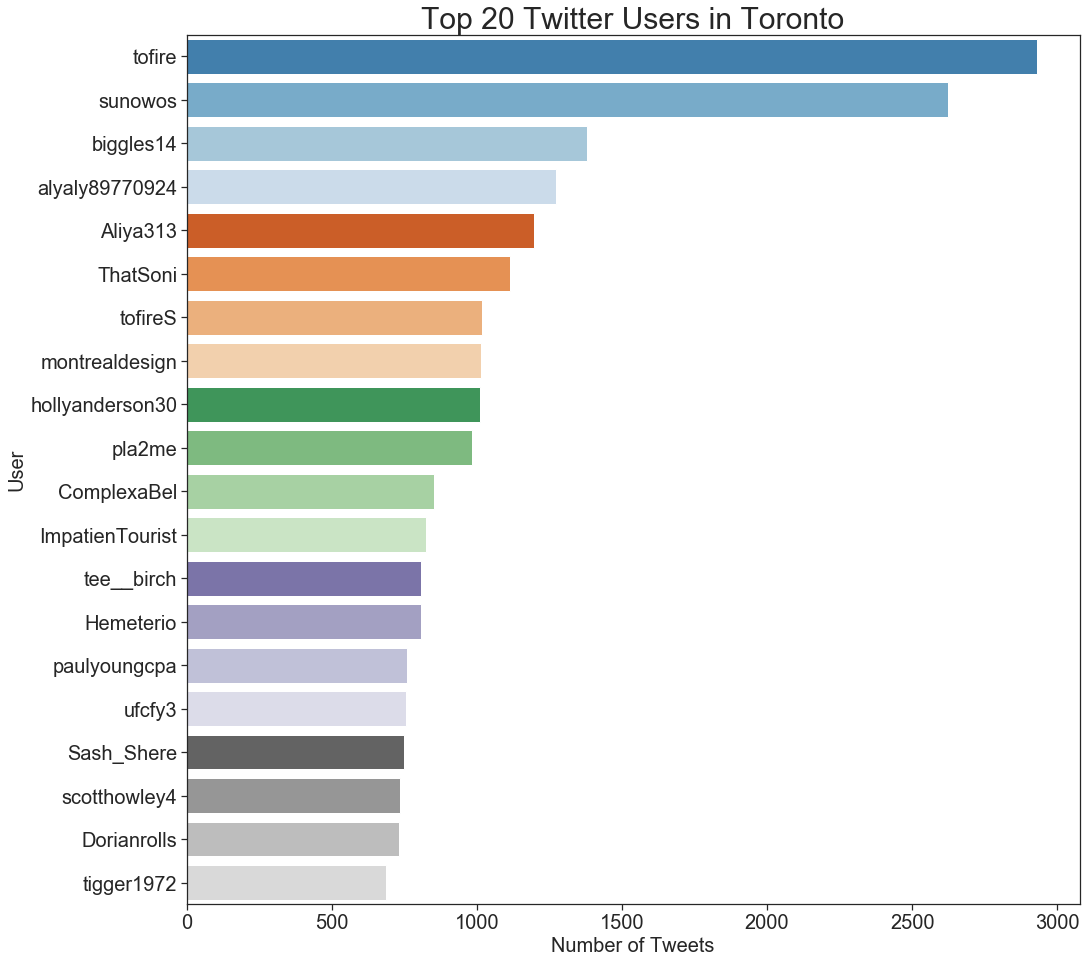

In [36]:
#tweets_df['user_name'].value_counts()[:20].plot(kind='barh')
#top_users = tweets_users.head(20)

plt.figure(figsize=(16,16))
ax = sns.barplot( x='count', y='user_name', data=tweets_users.head(20), palette="tab20c")
ax.axes.set_title("Top 20 Twitter Users in Toronto",fontsize=30)
ax.set_xlabel("Number of Tweets",fontsize=20)
ax.set_ylabel("User",fontsize=20)
ax.tick_params(labelsize=20)

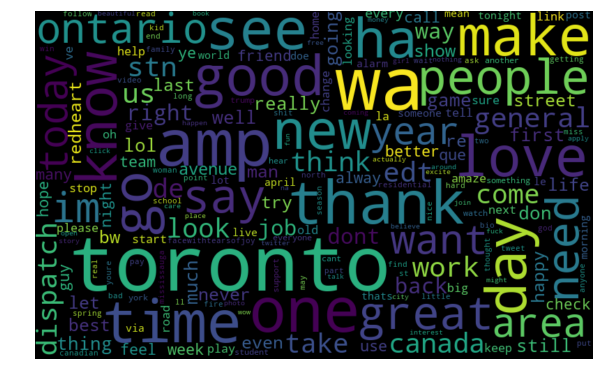

In [37]:
all_words = ' '.join([text for text in tweets_df['tweet_clean']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Top Words
The top word listed have moved "Toronto" to the top from 4 place previously, vs "wa".  No new words found in the top 5

In [38]:
# count of words
words = nltk.tokenize.word_tokenize(all_words)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
rslt_words = rslt[rslt['Word'].str.len() > 2]
rslt_words.head()

,Word,Frequency
2,toronto,17523
4,get,15783
5,like,15363
7,amp,12559
8,one,11163


##### Top 20 Words
"Ontario" is the only new word shown in the list with the filter applied, which removed "new" which was probably in the Top 20 previously because of the New York data included.

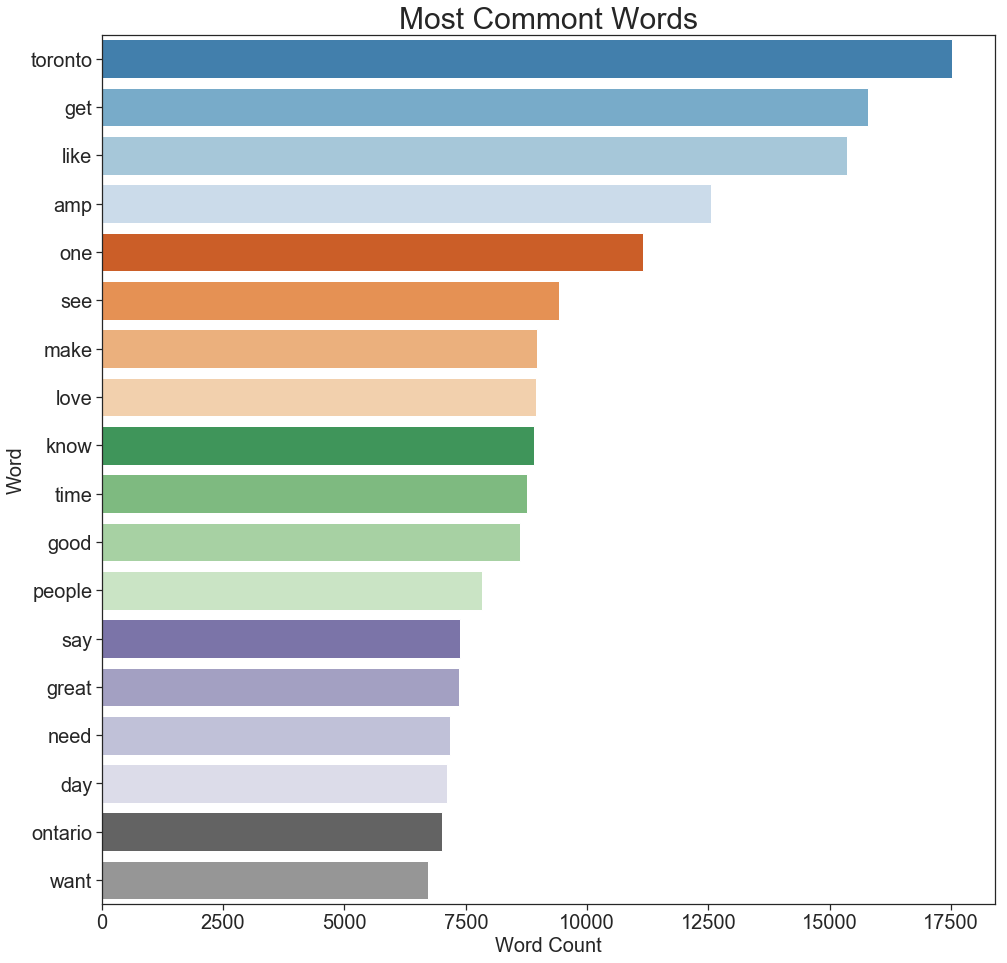

In [39]:
#ax = rslt_words.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt_words, palette="tab20c")
ax.axes.set_title("Most Commont Words",fontsize=30)
ax.set_xlabel("Word Count",fontsize=20)
ax.set_ylabel("Word",fontsize=20)
ax.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


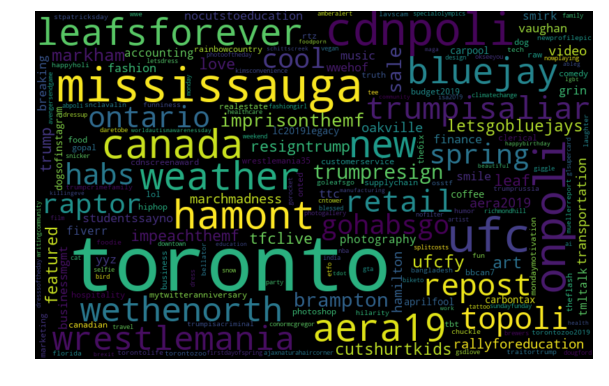

In [40]:
# Filter for tweets with hashtags
tweets_hash_df = tweets_df[tweets_df.hashtags.notnull()]
tweets_hash_df['hashtags'] = tweets_hash_df['hashtags'].apply(ast.literal_eval)
tweets_hash_df['hash'] = tweets_hash_df['hashtags'].apply(', '.join).str.lower()
hash_words = ', '.join([text for text in tweets_hash_df['hash']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(hash_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Top Hashtags
"Rochester" (2) was removed from the Top 5 hashtags and replaced with "cdnpoli" (5).  

In [41]:
words = nltk.tokenize.word_tokenize(hash_words)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt = rslt[rslt['Word'].str.len() > 1]
rslt.head()

,Word,Frequency
1,toronto,3233
2,mississauga,698
3,ufc,689
4,cdnpoli,638
5,onpoli,575


Words removed after filter
- rochester
- i90nysthruway
- traffic
- taconicstateparkway

Words added after filter
- wethenorth
- gohabsgo
- trumpresign
- habs

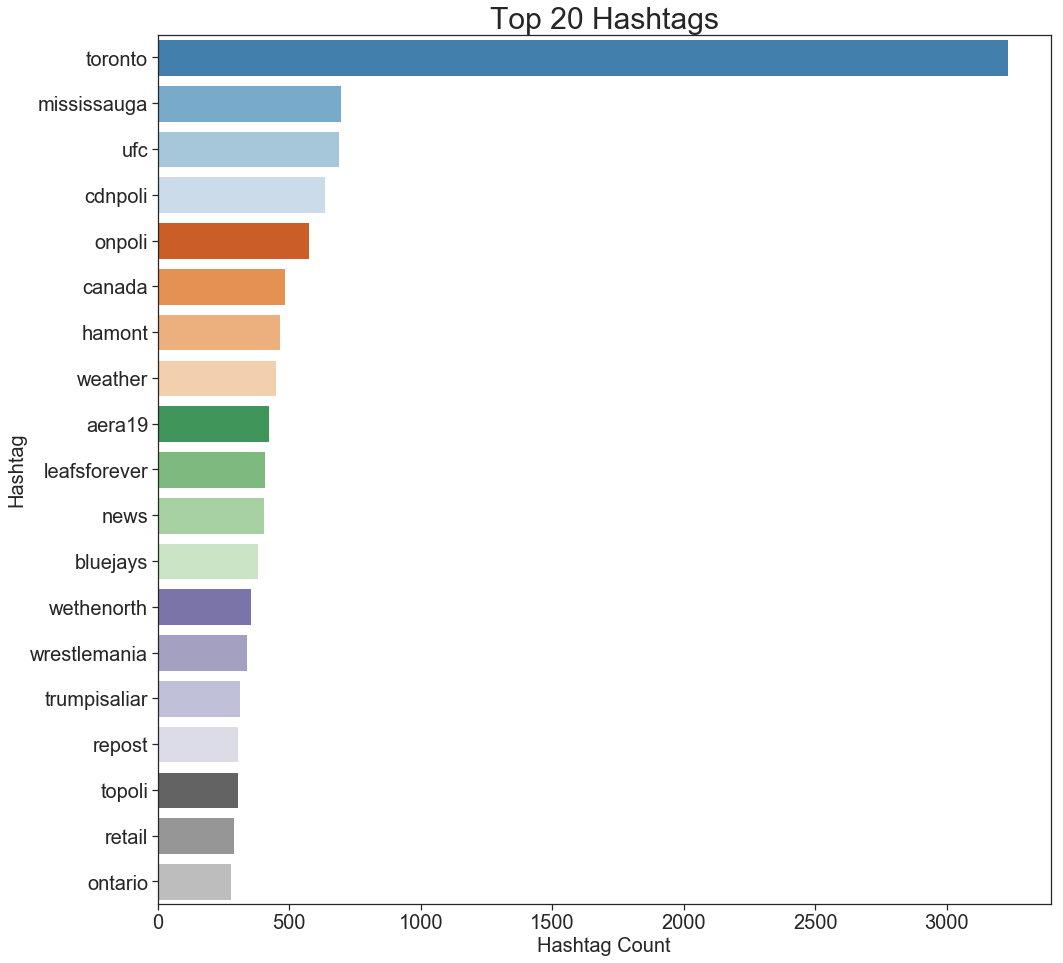

In [42]:
#ax = rslt.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Hashtags",fontsize=30)
ax.set_xlabel("Hashtag Count",fontsize=20)
ax.set_ylabel("Hashtag",fontsize=20)
ax.tick_params(labelsize=20)

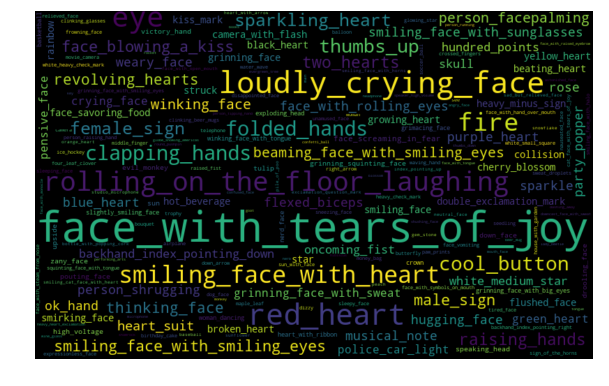

In [43]:
# Filter for tweets with emojis
tweets_emoji_df = tweets_df[tweets_df.hashtags.notnull()]
tweets_df['emojis'] = tweets_df['emojis'].apply(ast.literal_eval)
tweets_df['emo'] = tweets_df['emojis'].apply(', '.join).str.lower()
emoji_words = ', '.join([text for text in tweets_df['emo']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(emoji_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

"fire" replaces "smiling_face_with_heart-eyes" once the filter has been applied.

In [45]:
# remove punctuation
#tweets_df['emojis'] = tweets_df['emojis'].str.translate(translator)
tweets_df['emo'] = tweets_df['emo'].str.replace(":,", "").str.strip()



a = tweets_df['emo'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt = rslt.drop(rslt.index[0])
rslt.head()

,Word,Frequency
1,face_with_tears_of_joy,13559
2,loudly_crying_face,5869
3,red_heart,5707
4,rolling_on_the_floor_laughing,4849
5,fire,4368


"winking_face" is replaced with "revolving_hearts" in the top 20

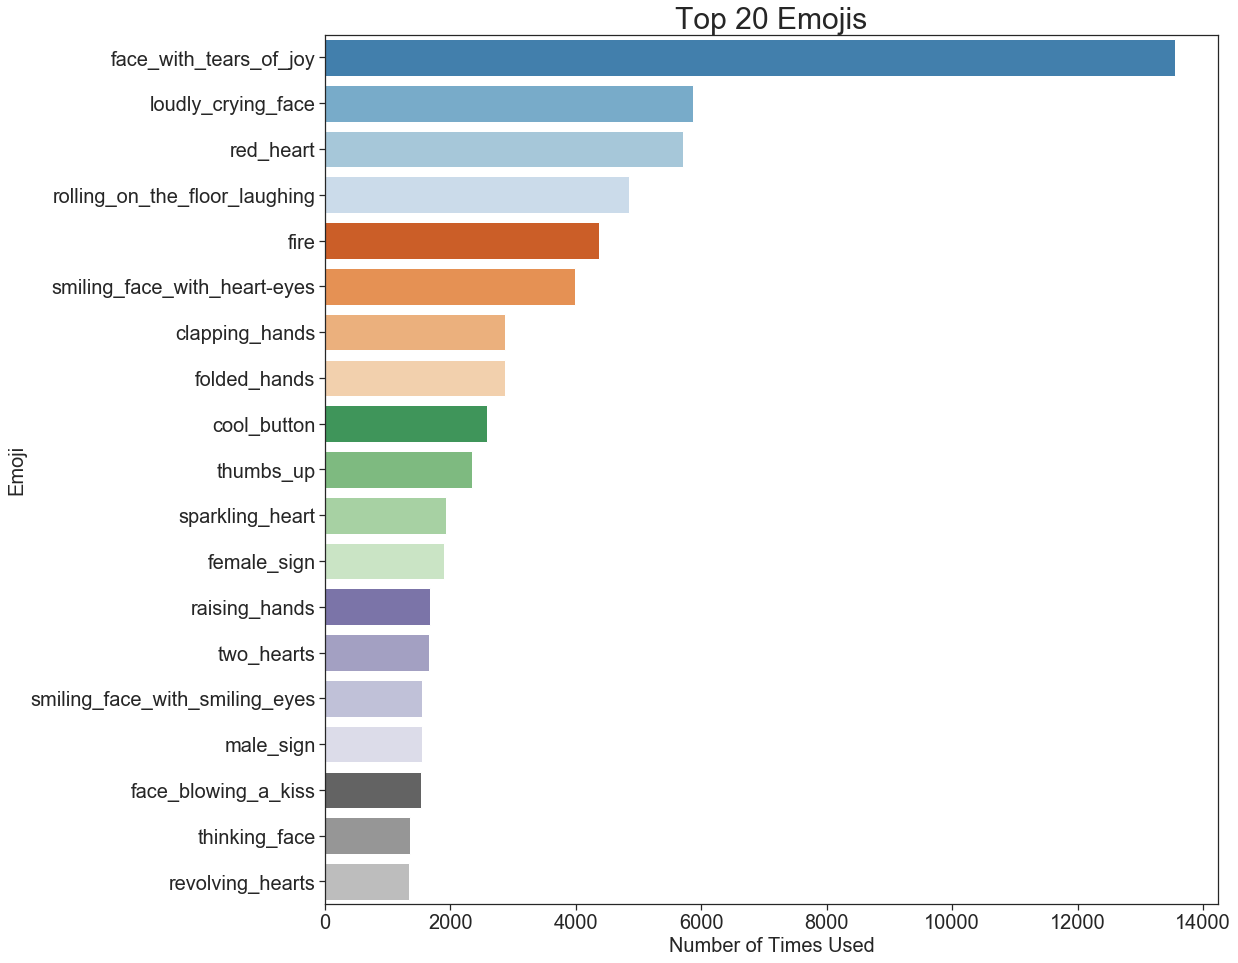

In [46]:
#ax = rslt.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Emojis",fontsize=30)
ax.set_xlabel("Number of Times Used",fontsize=20)
ax.set_ylabel("Emoji",fontsize=20)
ax.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


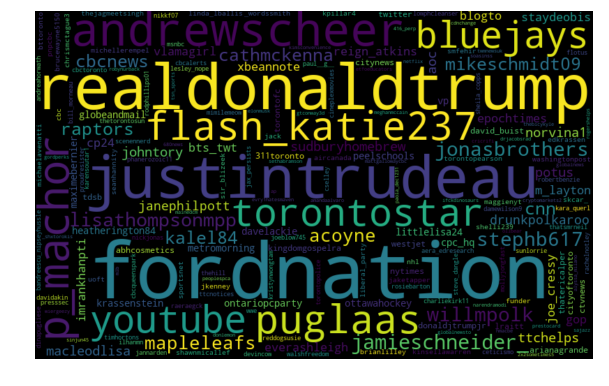

In [47]:
# Filter for tweets with mentions
tweets_mentions_df = tweets_df[tweets_df.mentions.notnull()]
tweets_mentions_df['mentions'] = tweets_mentions_df['mentions'].apply(ast.literal_eval)
tweets_mentions_df['ment'] = tweets_mentions_df['mentions'].apply(', '.join).str.lower()
mentions_words = ', '.join([text for text in tweets_mentions_df['ment']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(mentions_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Mentions Analysis
Remove punctuation in mention list and make a bag of words, this will count the number of tweets where a specific tweet user is mentioned.
Return list of Top 5 Mentions

youtube is replaced with "andrewscheer" which makes 4 of 5 mention politicians.

In [48]:
# remove punctuation
#tweets_hash_df['hash'] = tweets_hash_df['hash'].str.translate(translator)
tweets_mentions_df['ment'] = tweets_mentions_df['ment'].str.replace(",", "").str.strip()

a = tweets_mentions_df['ment'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Word,Frequency
0,fordnation,1515
1,realdonaldtrump,1383
2,justintrudeau,1206
3,andrewscheer,723
4,p_machor,616


Political mentions: (8 of Top 20)
- realdonaldtrump
- fordnation
- justintrudeau
- andrewscheer ("Leader of Canada's Conservatives...")
- puglaas ("MP for Vancouver-Granville")


Additions
- acoyne
- lisathompsonmpp
- mapleleafs
- kalel84
- mikeschmidt09


Removed 
- aoc ("Congresswoman for NY-14")
- bts_twt
- dougarrell
- potus (President Trump - White House)
- gop (Republican National Committee)

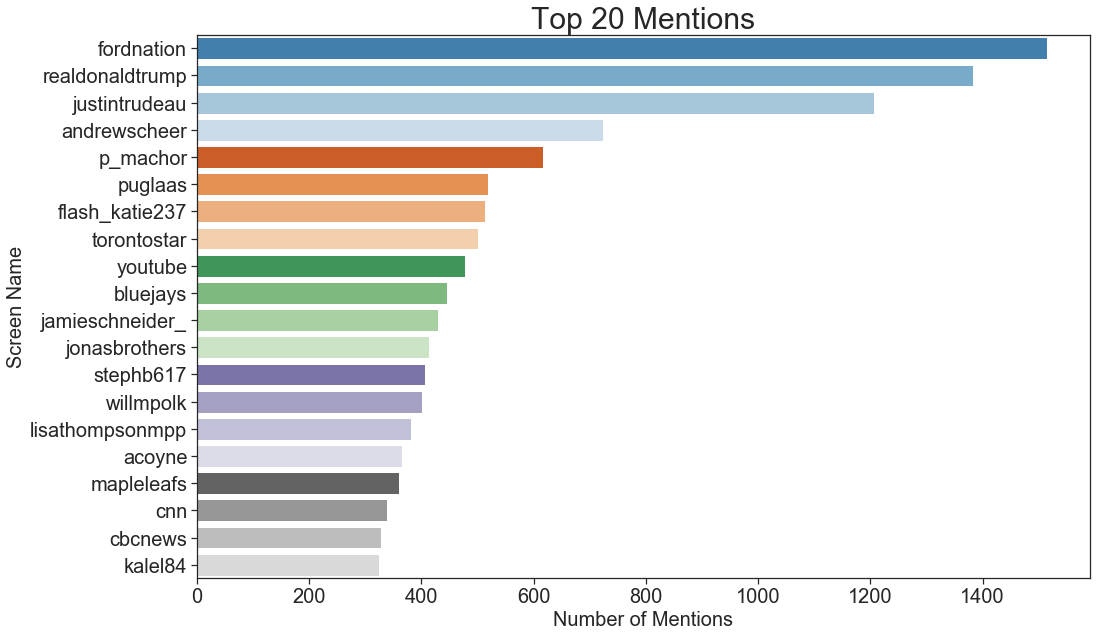

In [52]:
plt.figure(figsize=(16,10))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Mentions",fontsize=30)
ax.set_xlabel("Number of Mentions",fontsize=20)
ax.set_ylabel("Screen Name",fontsize=20)
ax.tick_params(labelsize=20)